In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imputation3 as imp

In [2]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [3]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)

In [4]:
train.head(2)

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
0           0.0  0.000273  3.0   -25.176       0.0443      0.724151   
1           0.0  0.184220  7.0       NaN          NaN      0.672221   

   Instrumentalness  Liveness  Valence    Tempo  ...  \
0          0.000062  0.000807    0.340   83.398  ...   
1          0.910000  0.034966    0.746  148.692  ...   

                               Album                                   Uri  \
0  Sinkovsky Plays and Sings Vivaldi  spotify:track:7njAZhca4o80qQdCgyEWya   
1                                NaN  spotify:track:2nnXe7n3Vivs7OfQKRsfWD   

                                         Url_spotify  \
0  https://open.spotify.com/artist/2QOIawHpSlOwXD...   
1  https://open.spotify.com/artist/2QOIawHpSlOwXD...   

                                   Url_youtube Comments  \
0  https://www.youtube.com/watch?v=NzCL9uLkQSI   3070.0   
1  https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   

                                         Description  \
0  Antonio Vivaldi's 4th Concerto - From his Most...   
1  A. Vivaldi Concerto No. 2 in G minor, RV 315, ...   

                                               Title       Channel  \
0  Antonio Vivaldi - Concerto No.4 in F minor, Op...   Mozafunkula   
1  A. Vivaldi Concerto No. 2 in G minor, RV 315, ...  Anton Paisov   

            Composer      Artist  
0                NaN  Marshmello  
1  Finneas O'Connell    Bon Iver  

[2 rows x 29 columns]

In [5]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

def getDatasetReady(data):
    categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
    # data.loc[data['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']
    data.set_index('id', inplace= True)
    data.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)



    labels = categoricalData(data, categoryList)

    for i in categoryList:
        if i != 'Key':
            data[i] = data[i].replace(labels[i])
    return data


In [6]:
trainProcess = getDatasetReady(train)

In [7]:
trainImputCopy = trainProcess.copy()
trainY = trainImputCopy['Danceability']
trainImputCopy = trainImputCopy.drop(columns=['Danceability'], axis=1)

INIT IMPUTER

In [8]:
trainImputCopy=trainImputCopy.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments', 'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']]

In [9]:
impute = imp.testImputate(trainImputCopy)

In [10]:
impute.loadPredictions()
trainInputed  = impute.miceTrainedModel(trainImputCopy, savePredictions=True)

___ Processing Energy ___
___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___
___ Processing Comments ___
___ Processing Duration_ms ___
___ Processing Key ___
___ Processing Album_type ___
___ Processing Url_spotify ___
___ Processing Channel ___
___ Processing Composer ___
-- Imputation Done --


In [11]:
trainInputed.head(3)

Energy   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                     
0   0.000273 -25.176000     0.044300      0.724151          0.000062   
1   0.184220 -10.662656     0.112644      0.672221          0.910000   
2   0.046035 -15.596000     0.068766      0.667628          0.867000   

    Liveness  Valence    Tempo         Views     Likes        Stream  \
id                                                                     
0   0.000807    0.340   83.398  1.921244e+07  137622.0  1.998137e+07   
1   0.034966    0.746  148.692  1.848250e+05    5190.0  4.281608e+07   
2   0.001772    0.380   84.899  1.848250e+05    5190.0  1.932081e+07   

    Comments  Duration_ms  Key  Album_type  Url_spotify  Channel  Composer  
id                                                                          
0     3070.0     117907.0  3.0         0.0          0.0      0.0       1.0  
1      122.0     173427.0  7.0         0.0          0.0      1.0       1.0  
2      122.0     150667.0  6.0         0.0          0.0      1.0       1.0

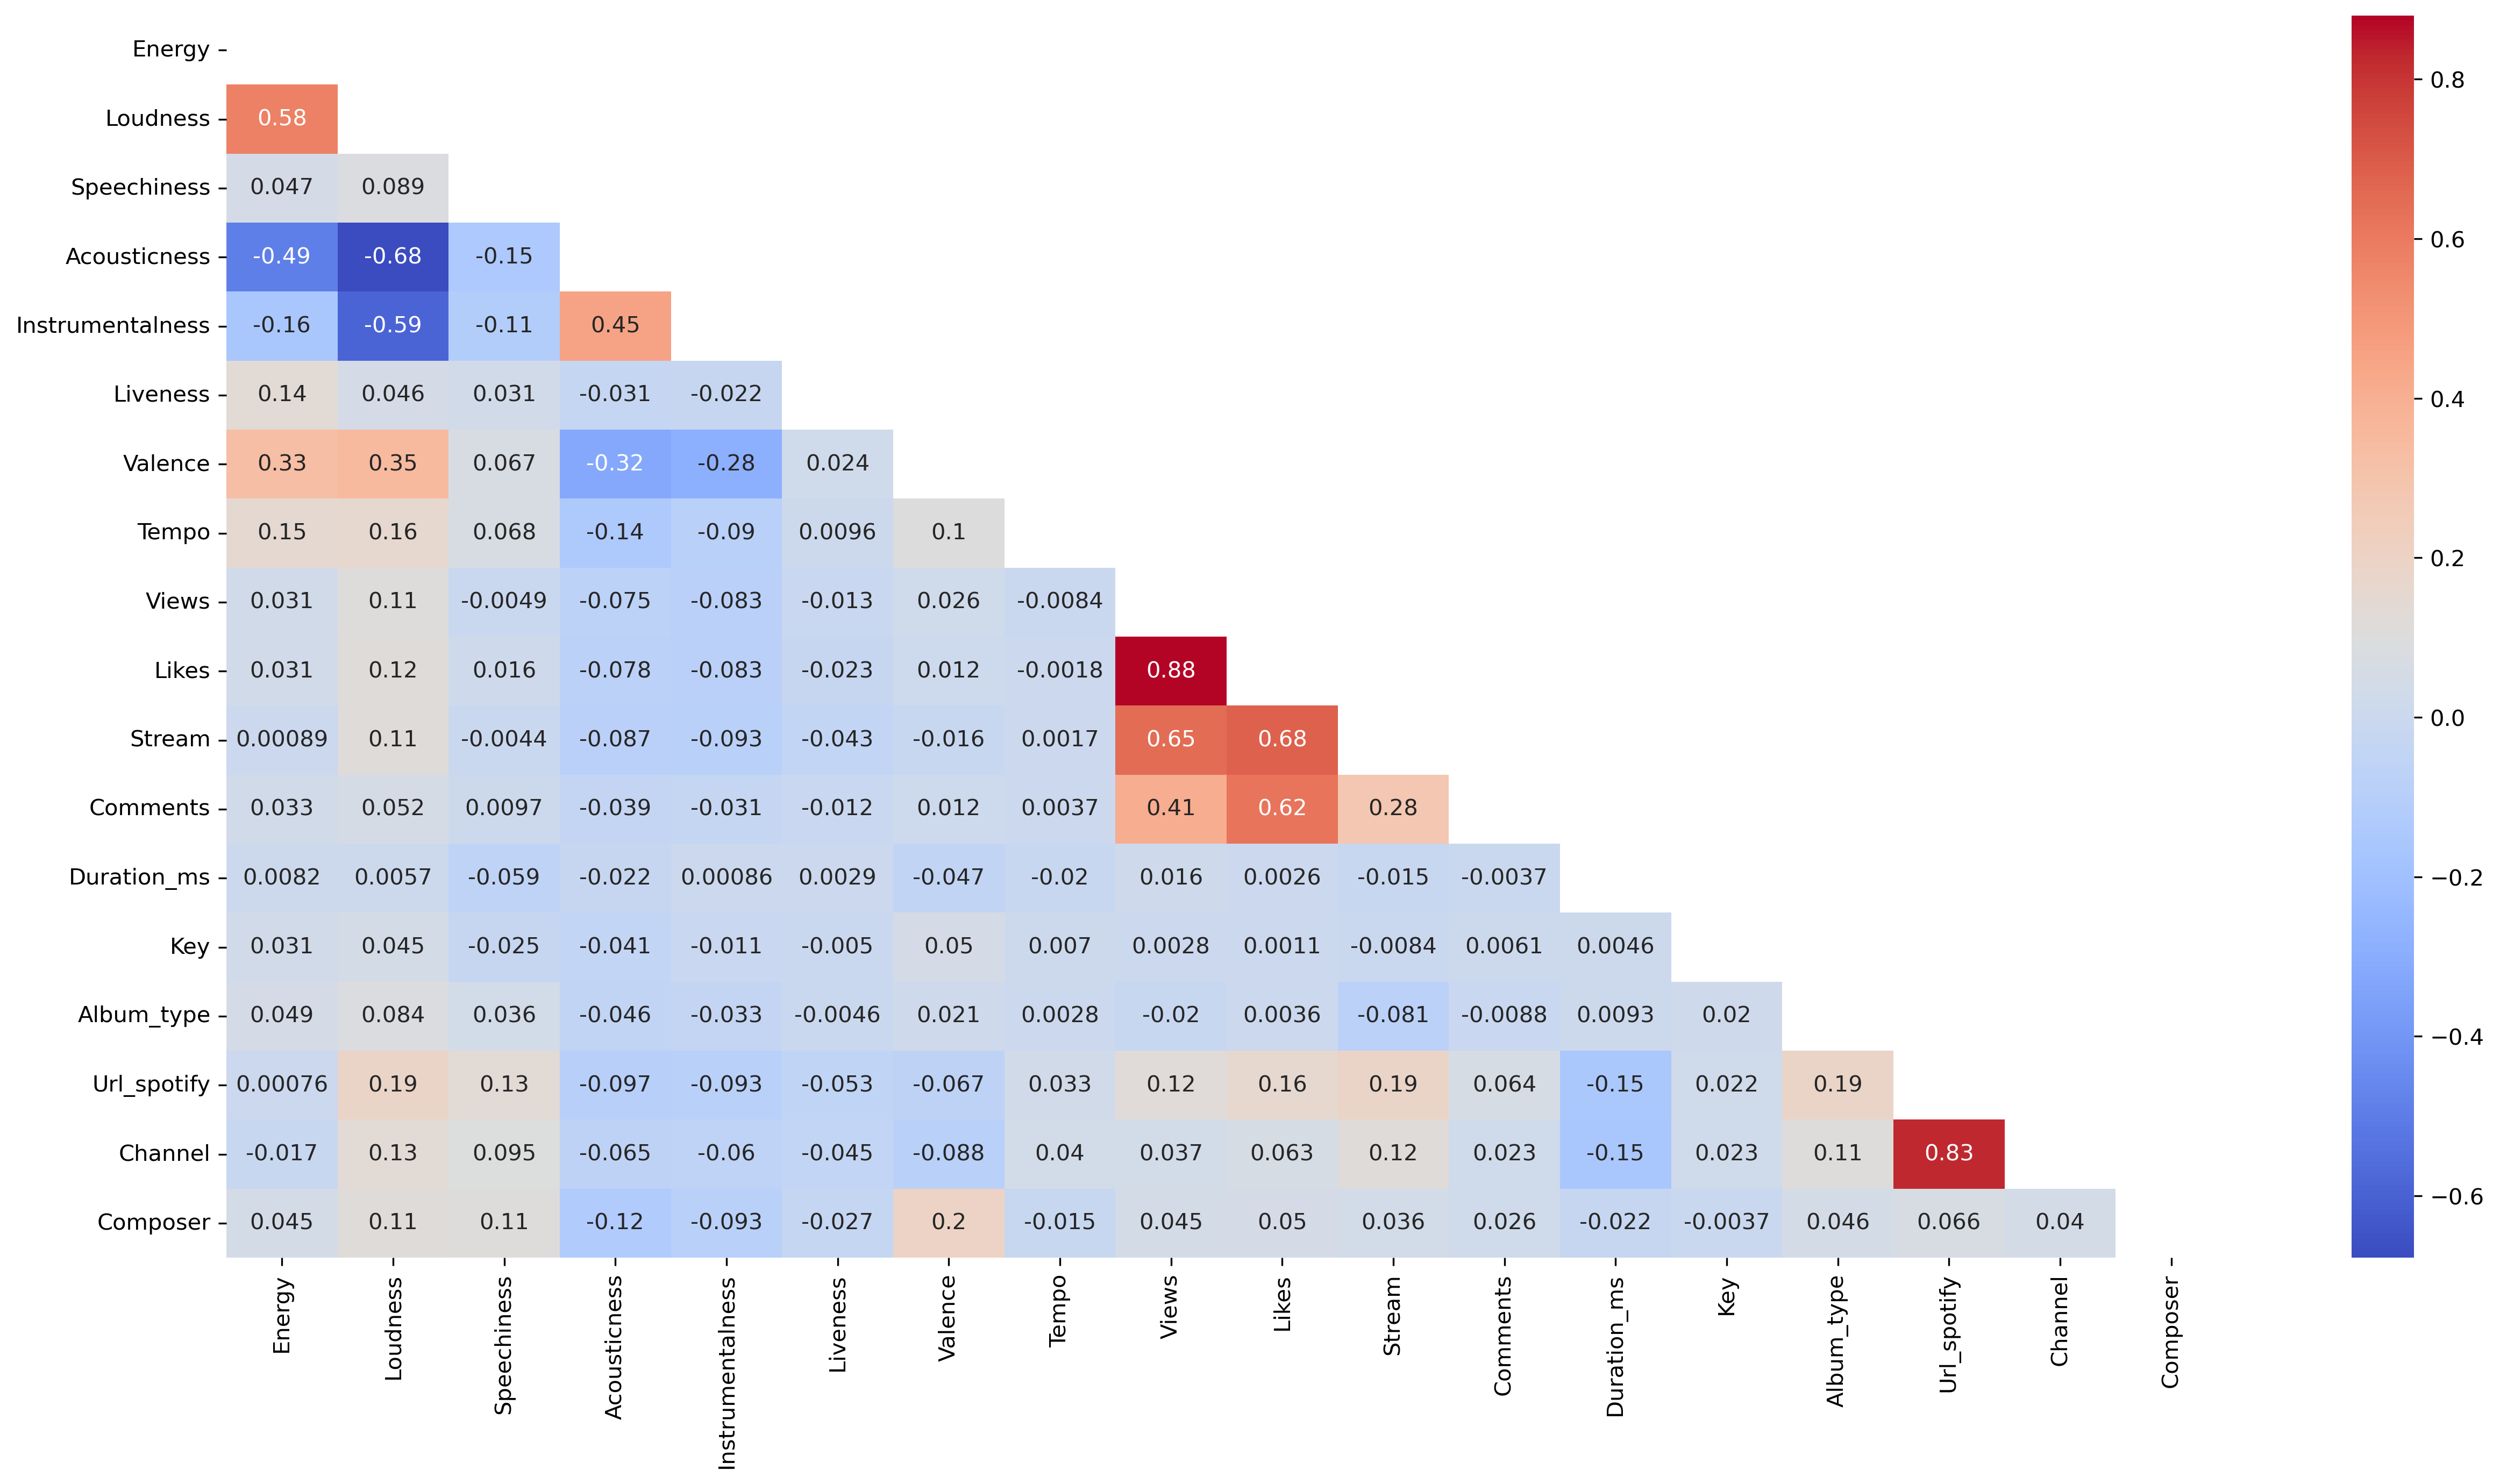

In [12]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(trainInputed.corr()))
dataplot = sns.heatmap(trainInputed.corr(), cmap="coolwarm", annot=True, mask=mask)

GET NEW DATA FOR IMPUTED DATASET

In [13]:
def processTrainingData(data):
    from sklearn.preprocessing import MinMaxScaler
    # from sklearn.preprocessing import OneHotEncoder

    dataCopy = data.copy()

    cat = ['Key','Album_type','Url_spotify','Channel','Composer']
    for i in cat:
        dataCopy[i]=dataCopy[i].astype(int)


    # trainedCat = dataCopy.iloc[:,dataCopy.columns.isin(['Key', 'Composer', "Album_type"])]
    standardize = dataCopy.iloc[:, dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream',  'Comments'])]
    normaldata = dataCopy.iloc[:, ~dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Comments' ])]

    # Scale Data
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(standardize)
    scaledDataPD = pd.DataFrame(scaledData, columns=standardize.columns)
    scaledDataPD.set_index(normaldata.index, inplace=True)  

    # OneHotEncoder
    # onehotEncoder =  OneHotEncoder()
    # encoded = onehotEncoder.fit_transform( trainedCat)
    # onehotEncodedData = pd.DataFrame(data=encoded.toarray(), columns=onehotEncoder.get_feature_names_out())
    # onehotEncodedData.set_index(normaldata.index, inplace=True)

    trainData = pd.concat((normaldata, scaledDataPD), axis=1)

    return scaler,  trainData

def processTrainingDataTest(data, scaler):

    dataCopy = data.copy()

    cat = ['Key','Album_type','Url_spotify','Channel','Composer']
    for i in cat:
        dataCopy[i]=dataCopy[i].astype(int)
    # trainedCat = dataCopy.iloc[:,dataCopy.columns.isin(['Key', 'Composer', "Album_type"])]
    standardize = dataCopy.iloc[:, dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream',  'Comments'])]
    normaldata = dataCopy.iloc[:, ~dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Comments' ])]


    # Scale Data
    scaler = scaler
    scaledData = scaler.transform(standardize)
    scaledDataPD = pd.DataFrame(scaledData, columns=standardize.columns)
    scaledDataPD = scaledDataPD.set_index(normaldata.index)
    scaledDataPD.set_index(normaldata.index, inplace=True)    

    # OneHotEncoder
    # onehotEncoder =  onehotEncoder
    # encoded = onehotEncoder.transform( trainedCat)
    # onehotEncodedData = pd.DataFrame(data=encoded.toarray(), columns=onehotEncoder.get_feature_names_out())
    # onehotEncodedData.set_index(normaldata.index, inplace=True)

    testData = pd.concat((normaldata, scaledDataPD), axis=1)

    return testData

PREPROCESSING 

In [14]:
scaler, trainDataReady = processTrainingData(trainInputed)

In [15]:
trainDataReady.head(3)

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
id                                                                             
0   0.000273     0.044300      0.724151          0.000062  0.000807    0.340   
1   0.184220     0.112644      0.672221          0.910000  0.034966    0.746   
2   0.046035     0.068766      0.667628          0.867000  0.001772    0.380   

      Tempo  Key  Album_type  Url_spotify  Channel  Composer  Loudness  \
id                                                                       
0    83.398    3           0            0        0         1  0.447642   
1   148.692    7           0            0        1         1  0.755912   
2    84.899    6           0            0        1         1  0.651126   

       Views     Likes    Stream  Comments  Duration_ms  
id                                                       
0   0.003328  0.003428  0.005898  0.000191     0.024976  
1   0.000032  0.000129  0.012641  0.000008     0.037104  
2   0.000032  0.000129  0.005703  0.000008     0.032132

SHUFFLE DATA

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_Validation, y_train, y_Validation = train_test_split(trainDataReady, trainY, test_size=0.2, random_state=42)

In [17]:
# from sklearn.utils import shuffle
# X_train, y_train = shuffle(trainDataReady, trainY)

GET READY TEST DATA

In [18]:
testProcess = getDatasetReady(test)

In [19]:
testProcess=testProcess.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments', 'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']]

In [20]:
testInputed  = impute.miceTrainedModel(testProcess, savePredictions=True)

___ Processing Energy ___
___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___
___ Processing Comments ___
___ Processing Duration_ms ___
___ Processing Key ___
___ Processing Album_type ___
___ Processing Url_spotify ___
___ Processing Channel ___
___ Processing Composer ___
-- Imputation Done --


In [21]:
partialAnswer=  partialAnswer.set_index('id')

In [22]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

In [23]:
testInputedData = testInputed.copy()


In [24]:
testInputedData = testInputedData.loc[partialAnswer.index, :]

In [25]:
testInputedData

Energy   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                        
18871  0.611960  -4.873391     0.071052      0.004574          0.000193   
18872  0.410132  -6.356726     0.091200      0.016777          0.001590   
18873  0.148036 -10.117000     0.280000      0.000007          0.079383   
18879  0.167284  -7.504550     0.101000      0.043987          0.000000   
18882  0.098611  -7.576000     0.040300      0.440711          0.000000   
...         ...        ...          ...           ...               ...   
23462  0.307725  -2.533880     0.033415      0.156774          0.013672   
23463  0.269900 -11.299350     0.104984      0.006946          0.001588   
23473  0.480568  -3.828332     0.075315      0.153384          0.001714   
23482  0.426223  -5.807545     0.072906      0.661708          0.898308   
23484  0.014679 -14.737176     0.082686      0.076426          0.214188   

       Liveness   Valence       Tempo         Views          Likes  \
id                                                                   
18871  0.000634  0.635413  121.002000  1.488170e+08  937061.000000   
18872  0.029038  0.962000  121.002000  1.488170e+08  940001.238702   
18873  0.066923  0.512154   99.439000  4.140185e+06   54975.265002   
18879  0.003049  0.391000  118.114252  8.687921e+07  703605.000000   
18882  0.000625  0.450000  125.900000  3.363790e+05    9175.000000   
...         ...       ...         ...           ...            ...   
23462  0.001309  0.770259   95.871722  2.393215e+06   48870.132301   
23463  0.001355  0.466107  103.858359  1.175475e+08  380658.971091   
23473  0.000114  0.287141   91.755727  7.459512e+06     829.008568   
23482  0.000662  0.087281   87.969239 -3.451740e+06   23051.629825   
23484  0.001583  0.735073   98.873933  8.333485e+06   92354.814253   

             Stream      Comments    Duration_ms   Key  Album_type  \
id                                                                   
18871  1.112196e+08  24156.000000  255773.000000  10.0         0.0   
18872  1.499055e+08  24156.000000  241541.639076   3.0         0.0   
18873  4.495917e+07   1597.000000  217097.658709   6.0         0.0   
18879  1.986931e+07  14291.000000  302602.000000  10.0         2.0   
18882  9.368100e+05    379.000000   77480.000000  10.0         0.0   
...             ...           ...            ...   ...         ...   
23462  4.514250e+07   6036.000000  123963.758812   7.0         0.0   
23463  6.228127e+07    940.000000  193565.214910   0.0         2.0   
23473  3.013345e+06    202.000000  193892.112089   8.0         0.0   
23482  1.849094e+07  98719.766965  185842.047750   5.0         2.0   
23484  3.439282e+06     11.000000  160431.173035  11.0         0.0   

       Url_spotify  Channel  Composer  
id                                     
18871   590.609438    562.0       2.0  
18872   183.000000    562.0       2.0  
18873   183.000000    566.0       2.0  
18879   932.900397    569.0       3.0  
18882   184.000000    570.0       4.0  
...            ...      ...       ...  
23462   973.000000    187.0       1.0  
23463    24.000000   2629.0       2.0  
23473   634.000000   2633.0       1.0  
23482   114.000000   2636.0       7.0  
23484   566.251168    261.0       0.0  

[631 rows x 18 columns]

In [26]:
testInputedDataReady = processTrainingDataTest(testInputedData, scaler)

In [27]:
testInputedDataReady.head(3)

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
18871  0.611960     0.071052      0.004574          0.000193  0.000634   
18872  0.410132     0.091200      0.016777          0.001590  0.029038   
18873  0.148036     0.280000      0.000007          0.079383  0.066923   

        Valence    Tempo  Key  Album_type  Url_spotify  Channel  Composer  \
id                                                                          
18871  0.635413  121.002   10           0          590      562         2   
18872  0.962000  121.002    3           0          183      562         2   
18873  0.512154   99.439    6           0          183      566         2   

       Loudness     Views     Likes    Stream  Comments  Duration_ms  
id                                                                    
18871  0.878879  0.025775  0.023340  0.032840  0.001502     0.055091  
18872  0.847372  0.025775  0.023414  0.044263  0.001502     0.051983  
18873  0.767502  0.000717  0.001369  0.013274  0.000099     0.046643

In [28]:
X_test = testInputedDataReady
y_test = partialAnswer

# X_Validation = X_test
# y_Validation = y_test

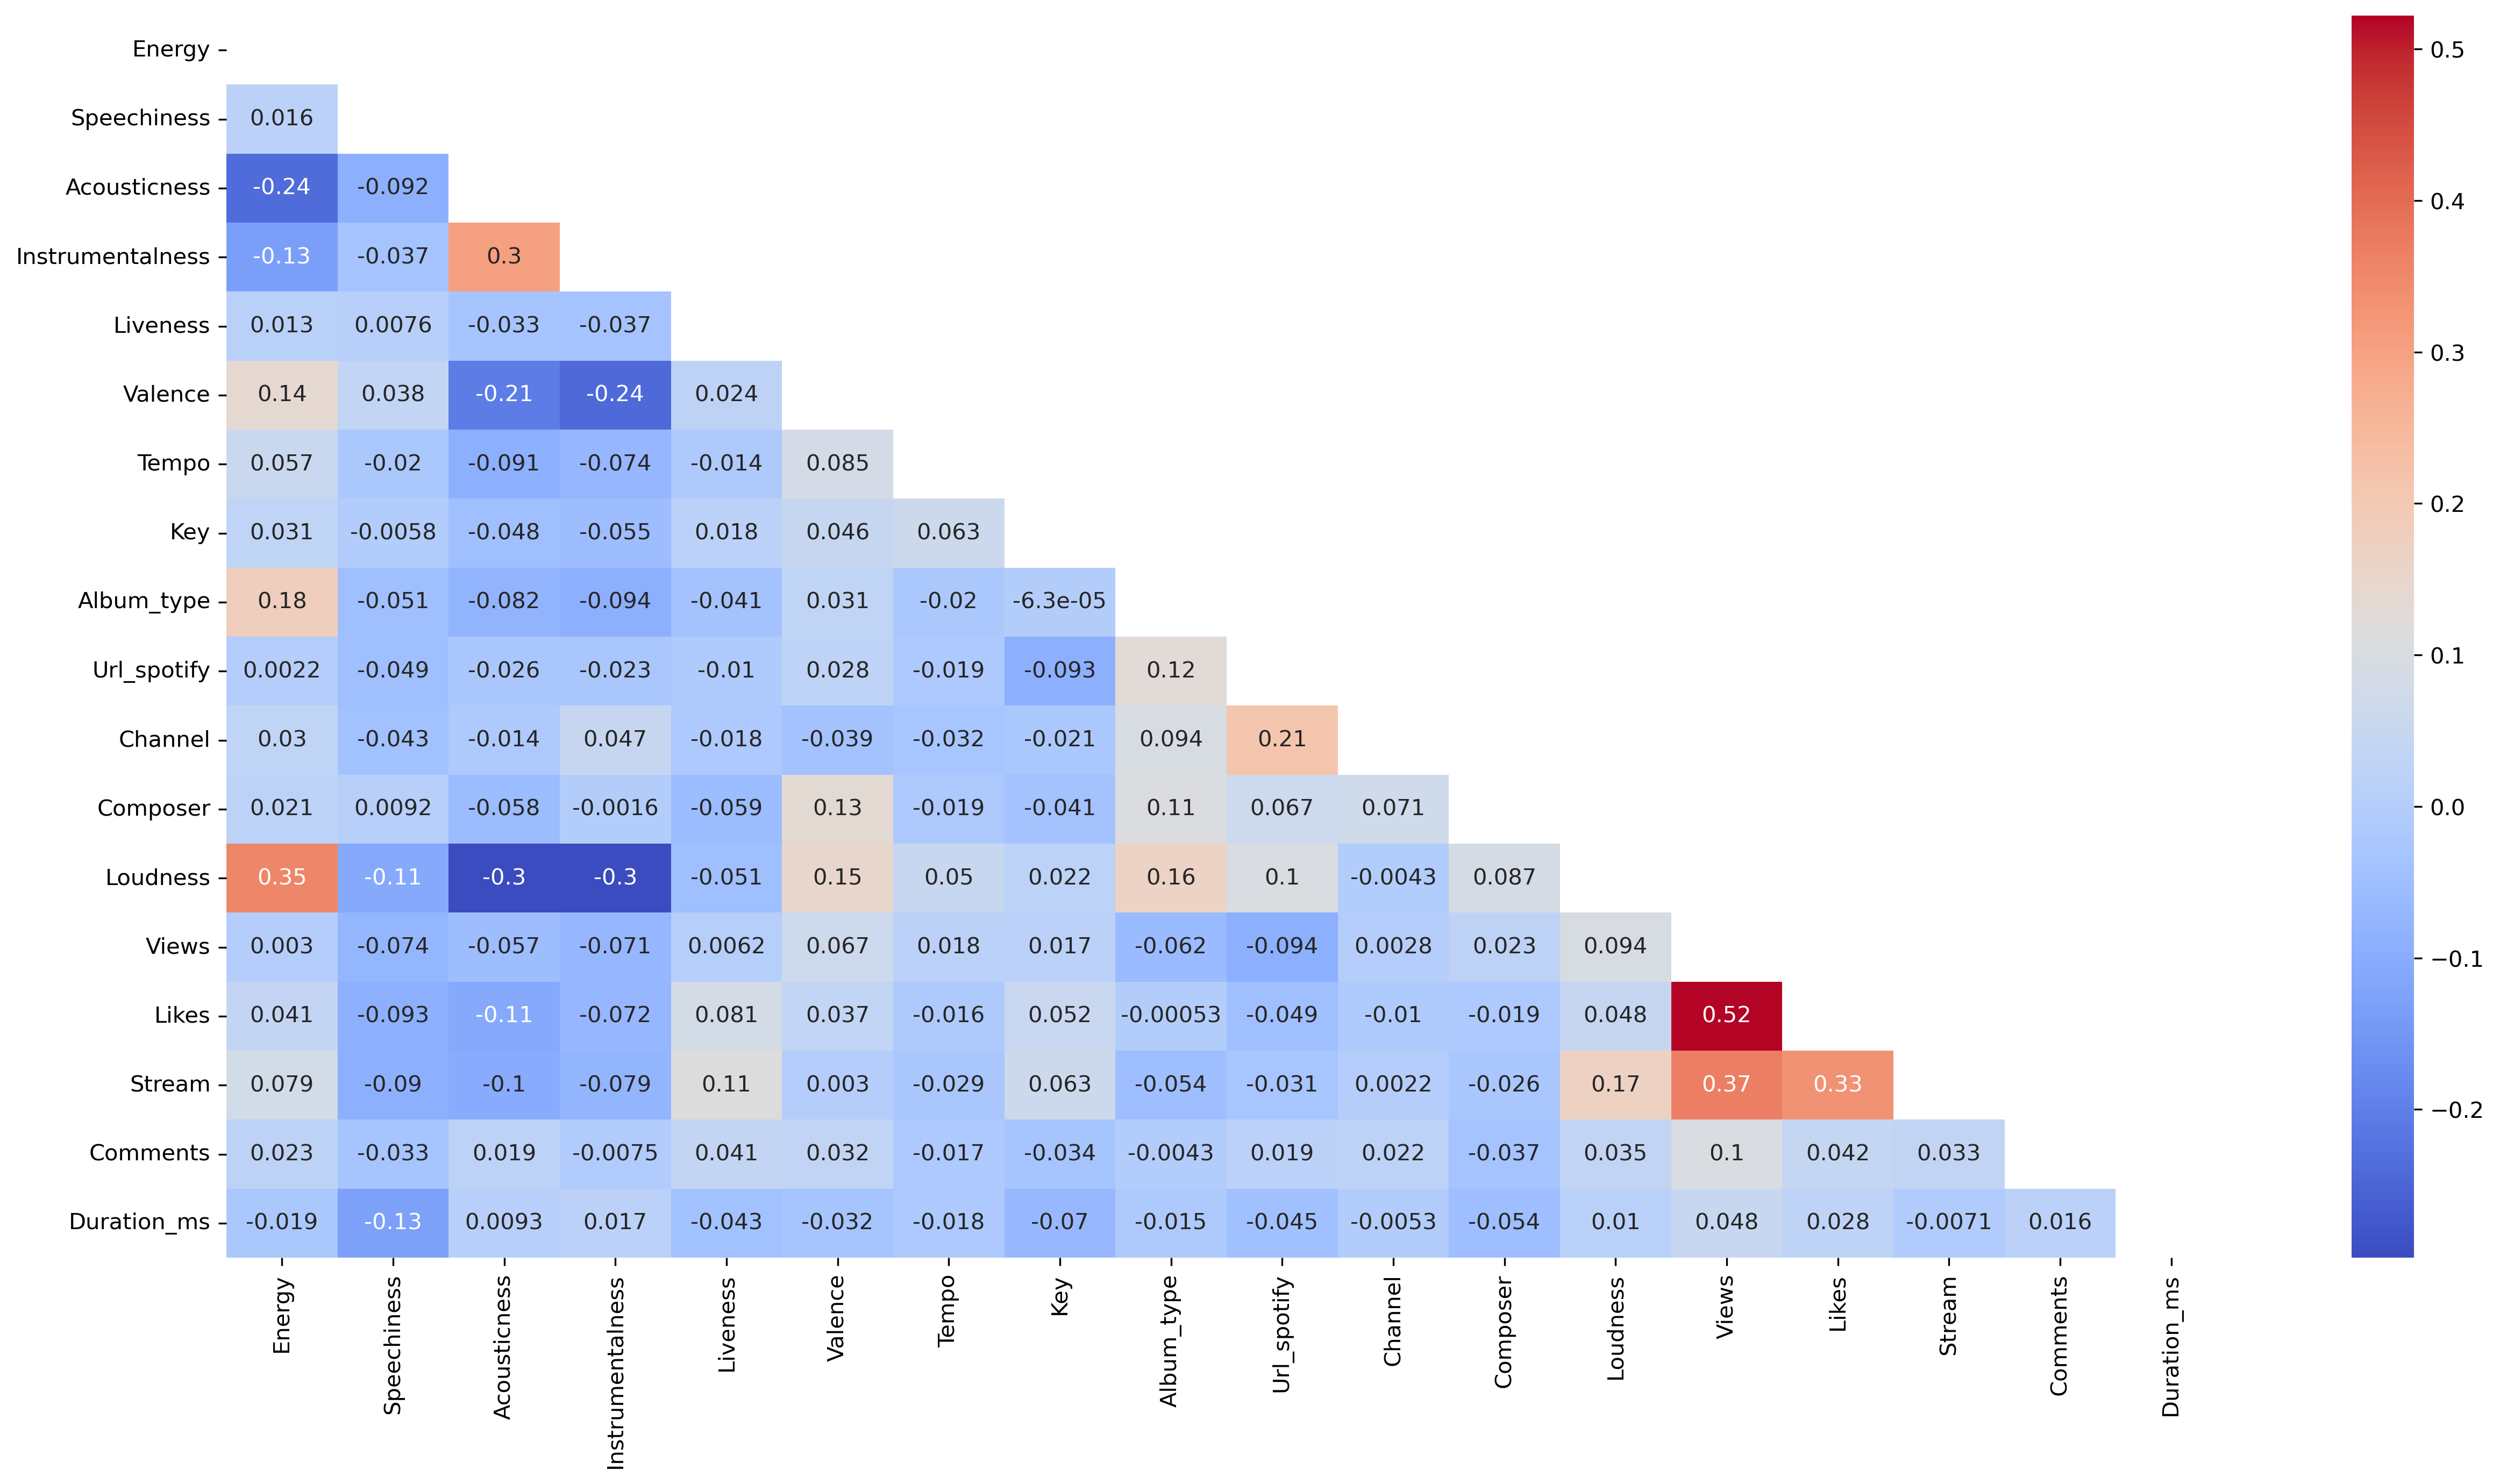

In [29]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(X_test.corr()))
dataplot = sns.heatmap(X_test.corr(), cmap="coolwarm", annot=True, mask=mask)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def printErrors(y, y_hat):
    acc = accuracy_score(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)

    print(f'ACC: {acc * 100}, MAE:{mae}, MSE:{mse}')
    # return acc * 100, mae, mse

In [31]:
totaltest = testInputed.copy()

totaltest_X = processTrainingDataTest(totaltest, scaler)

In [32]:
totaltest_X.head(3)

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
17170  0.350403       0.1770  5.842771e-07          0.002330  0.230346   
17171  0.347429       0.0302  3.225859e-02          0.000687  0.000099   
17172  0.786330       0.0522  7.676563e-05          0.020704  0.001561   

       Valence    Tempo  Key  Album_type  Url_spotify  Channel  Composer  \
id                                                                         
17170  0.53541  138.559    6           0            0        0         0   
17171  0.85200   92.761    8           0            0        0         1   
17172  0.55100  108.014    1           2            0        0         1   

       Loudness     Views     Likes    Stream  Comments  Duration_ms  
id                                                                    
17170  0.840527  0.120121  0.154951  0.307168  0.010564     0.047854  
17171  0.858879  0.012472  0.020182  0.091562  0.001928     0.042946  
17172  0.898917  0.001461  0.007028  0.018620  0.000460     0.046218

In [33]:
categorical_features = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

In [73]:
predictTest = pd.DataFrame()
predictionResults = pd.DataFrame()

In [41]:
# import lightgbm as lgb
# from itertools import product
# from tqdm import tqdm
# import warnings

# warnings.filterwarnings("ignore")

# # Create a logger and set verbosity level
# # logger =  lgb.getLogger()
# # logger.setLevel(lgb.logging.WARNING)

# categories = len(y_test['Danceability'].unique())

# # learning_rate = [0.001, 0.03, 0.3]
# # max_depth = [4, 5, 10]
# # num_leaves = [50, 100, 200]
# # bagging_fraction = [0.4, 0.6, 0.8]
# # bagging_freq = [2, 5, 10]
# # objective = ['multiclass', 'multiclassova']
# # boosting_type = ['gbdt', 'rf', 'dart', 'goss']
# # tree_learner = ['feature', 'data', 'voting']

# lr = [0.001]
# max_depth = [4, 5, 10]
# num_leaves = [50, 100, 200]
# bagging_fraction = [0.4, 0.6, 0.8]
# bagging_freq = [2, 5, 10]
# objective = ['multiclass', 'multiclassova']
# boosting_type = ['gbdt', 'rf']
# tree_learner = ['feature', 'data', 'voting']


# filter = list(product(lr, max_depth, num_leaves, bagging_fraction, bagging_freq, objective, boosting_type, tree_learner))

# categorical_features = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

# # pbar = tqdm(total=len(filter))

# lgb_train = lgb.Dataset(X_train, y_train, categorical_feature= categorical_features, free_raw_data=False)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)

# byAcc = -float('inf')
# paramByAcc = {}
# byMAE = float('inf')
# paramByMAE = {}
# best_iterationAcc = 0
# best_iterationMAE = 0

# for learning_rate, max_depth, num_leaves, bagging_fraction, bagging_freq,  objective, boosting_type,  tree_learner  in filter:
    
#     if boosting_type == 'goss':
#         lightParams1 = {
#         'objective': objective,
#         'num_class': categories ,  # Specify the number of classes
#         'metric': 'multi_error',
#         'boosting_type': boosting_type,
#         "max_depth": max_depth,
#         "num_leaves": num_leaves,
#         # "bagging_fraction": bagging_fraction,
#         # "bagging_freq": bagging_freq,
#         'learning_rate':learning_rate,
#         'tree_learner':tree_learner,
#         # 'max_bin': 255,
#         # 'device': 'gpu',
#         "verbosity": -1
#         }
#     else:

#         lightParams1 = {
#         'objective': objective,
#         'num_class': categories ,  # Specify the number of classes
#         'metric': 'multi_error',
#         'boosting_type': boosting_type,
#         "max_depth": max_depth,
#         "num_leaves": num_leaves,
#         "bagging_fraction": bagging_fraction,
#         "bagging_freq": bagging_freq,
#         'learning_rate':learning_rate,
#         'tree_learner':tree_learner,
#         # 'max_bin': 255,
#         # 'device': 'gpu',
        
#         "verbosity": -1
#     }

#     gbm = lgb.train(lightParams1, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=10,  verbose_eval=False)# callbacks=[lgb.early_stopping(stopping_rounds=5)])

#     pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
#     y_pred = pred.argmax(axis=1)

#     acc = accuracy_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)

#     if acc > byAcc:
#         byAcc = acc
#         paramByAcc = lightParams1
#         best_iterationAcc = gbm.best_iteration

#     if mae < byMAE:
#         byMAE = mae
#         paramByMAE = lightParams1
#         best_iterationMAE = gbm.best_iteration
    





# print("RESULTS")
# print("By ACC")
# print(f'acc: {byAcc}')
# print(f'best_iterationAcc: {best_iterationAcc}')
# print(f'Parameters: {paramByAcc}')
# print("----------------------------------------------------------------")
# print("By MAE")
# print(f'acc: {byMAE}')
# print(f'best_iterationAcc: {best_iterationMAE}')
# print(f'Parameters: {paramByMAE}')



    

RESULTS
By ACC
acc: 0.1949286846275753
best_iterationAcc: 24
Parameters: {'objective': 'multiclassova', 'num_class': 10, 'metric': 'multi_error', 'boosting_type': 'rf', 'max_depth': 10, 'num_leaves': 200, 'bagging_fraction': 0.4, 'bagging_freq': 2, 'learning_rate': 0.001, 'tree_learner': 'feature', 'verbosity': -1}
----------------------------------------------------------------
By MAE
acc: 2.698890649762282
best_iterationAcc: 44
Parameters: {'objective': 'multiclass', 'num_class': 10, 'metric': 'multi_error', 'boosting_type': 'rf', 'max_depth': 10, 'num_leaves': 100, 'bagging_fraction': 0.4, 'bagging_freq': 5, 'learning_rate': 0.001, 'tree_learner': 'feature', 'verbosity': -1}


In [44]:
# import lightgbm as lgb
# from itertools import product
# from tqdm import tqdm
# import warnings

# warnings.filterwarnings("ignore")

# # Create a logger and set verbosity level
# # logger =  lgb.getLogger()
# # logger.setLevel(lgb.logging.WARNING)

# categories = len(y_test['Danceability'].unique())

# # learning_rate = [0.001, 0.03, 0.3]
# # max_depth = [4, 5, 10]
# # num_leaves = [50, 100, 200]
# # bagging_fraction = [0.4, 0.6, 0.8]
# # bagging_freq = [2, 5, 10]
# # objective = ['multiclass', 'multiclassova']
# # boosting_type = ['gbdt', 'rf', 'dart', 'goss']
# # tree_learner = ['feature', 'data', 'voting']

# lr = [0.03]
# max_depth = [4, 5, 10]
# num_leaves = [50, 100, 200]
# bagging_fraction = [0.4, 0.6, 0.8]
# bagging_freq = [2, 5, 10]
# objective = ['multiclass', 'multiclassova']
# boosting_type = ['gbdt', 'rf']
# tree_learner = ['feature', 'data', 'voting']


# filter = list(product(lr, max_depth, num_leaves, bagging_fraction, bagging_freq, objective, boosting_type, tree_learner))

# categorical_features = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

# # pbar = tqdm(total=len(filter))

# lgb_train = lgb.Dataset(X_train, y_train, categorical_feature= categorical_features, free_raw_data=False)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)

# byAcc = -float('inf')
# paramByAcc = {}
# byMAE = float('inf')
# paramByMAE = {}
# best_iterationAcc = 0
# best_iterationMAE = 0

# for learning_rate, max_depth, num_leaves, bagging_fraction, bagging_freq,  objective, boosting_type,  tree_learner  in filter:
    
   

#     lightParams1 = {
#         'objective': objective,
#         'num_class': categories ,  # Specify the number of classes
#         'metric': 'multi_error',
#         'boosting_type': boosting_type,
#         "max_depth": max_depth,
#         "num_leaves": num_leaves,
#         "bagging_fraction": bagging_fraction,
#         "bagging_freq": bagging_freq,
#         'learning_rate':learning_rate,
#         'tree_learner':tree_learner,
#         # 'max_bin': 255,
#         # 'device': 'gpu',
        
#         "verbosity": -1
#     }

#     gbm = lgb.train(lightParams1, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=10,  verbose_eval=False)# callbacks=[lgb.early_stopping(stopping_rounds=5)])

#     pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
#     y_pred = pred.argmax(axis=1)

#     acc = accuracy_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)

#     if acc > byAcc:
#         byAcc = acc
#         paramByAcc = lightParams1
#         best_iterationAcc = gbm.best_iteration

#     if mae < byMAE:
#         byMAE = mae
#         paramByMAE = lightParams1
#         best_iterationMAE = gbm.best_iteration
    





# print("RESULTS")
# print("By ACC")
# print(f'acc: {byAcc}')
# print(f'best_iterationAcc: {best_iterationAcc}')
# print(f'Parameters: {paramByAcc}')
# print("----------------------------------------------------------------")
# print("By MAE")
# print(f'acc: {byMAE}')
# print(f'best_iterationAcc: {best_iterationMAE}')
# print(f'Parameters: {paramByMAE}')



    

RESULTS
By ACC
acc: 0.1949286846275753
best_iterationAcc: 24
Parameters: {'objective': 'multiclassova', 'num_class': 10, 'metric': 'multi_error', 'boosting_type': 'rf', 'max_depth': 10, 'num_leaves': 200, 'bagging_fraction': 0.4, 'bagging_freq': 2, 'learning_rate': 0.03, 'tree_learner': 'feature', 'verbosity': -1}
----------------------------------------------------------------
By MAE
acc: 2.6212361331220286
best_iterationAcc: 50
Parameters: {'objective': 'multiclass', 'num_class': 10, 'metric': 'multi_error', 'boosting_type': 'gbdt', 'max_depth': 10, 'num_leaves': 100, 'bagging_fraction': 0.4, 'bagging_freq': 5, 'learning_rate': 0.03, 'tree_learner': 'feature', 'verbosity': -1}


In [45]:
# import lightgbm as lgb
# from itertools import product
# from tqdm import tqdm
# import warnings

# warnings.filterwarnings("ignore")

# # Create a logger and set verbosity level
# # logger =  lgb.getLogger()
# # logger.setLevel(lgb.logging.WARNING)

# categories = len(y_test['Danceability'].unique())

# # learning_rate = [0.001, 0.03, 0.3]
# # max_depth = [4, 5, 10]
# # num_leaves = [50, 100, 200]
# # bagging_fraction = [0.4, 0.6, 0.8]
# # bagging_freq = [2, 5, 10]
# # objective = ['multiclass', 'multiclassova']
# # boosting_type = ['gbdt', 'rf', 'dart', 'goss']
# # tree_learner = ['feature', 'data', 'voting']

# lr = [0.3]
# max_depth = [4, 5, 10]
# num_leaves = [50, 100, 200]
# bagging_fraction = [0.4, 0.6, 0.8]
# bagging_freq = [2, 5, 10]
# objective = ['multiclass', 'multiclassova']
# boosting_type = ['gbdt', 'rf']
# tree_learner = ['feature', 'data', 'voting']


# filter = list(product(lr, max_depth, num_leaves, bagging_fraction, bagging_freq, objective, boosting_type, tree_learner))

# categorical_features = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

# # pbar = tqdm(total=len(filter))

# lgb_train = lgb.Dataset(X_train, y_train, categorical_feature= categorical_features, free_raw_data=False)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)

# byAcc = -float('inf')
# paramByAcc = {}
# byMAE = float('inf')
# paramByMAE = {}
# best_iterationAcc = 0
# best_iterationMAE = 0

# for learning_rate, max_depth, num_leaves, bagging_fraction, bagging_freq,  objective, boosting_type,  tree_learner  in filter:
    
   

#     lightParams1 = {
#         'objective': objective,
#         'num_class': categories ,  # Specify the number of classes
#         'metric': 'multi_error',
#         'boosting_type': boosting_type,
#         "max_depth": max_depth,
#         "num_leaves": num_leaves,
#         "bagging_fraction": bagging_fraction,
#         "bagging_freq": bagging_freq,
#         'learning_rate':learning_rate,
#         'tree_learner':tree_learner,
#         # 'max_bin': 255,
#         # 'device': 'gpu',
        
#         "verbosity": -1
#     }

#     gbm = lgb.train(lightParams1, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=10,  verbose_eval=False)# callbacks=[lgb.early_stopping(stopping_rounds=5)])

#     pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
#     y_pred = pred.argmax(axis=1)

#     acc = accuracy_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)

#     if acc > byAcc:
#         byAcc = acc
#         paramByAcc = lightParams1
#         best_iterationAcc = gbm.best_iteration

#     if mae < byMAE:
#         byMAE = mae
#         paramByMAE = lightParams1
#         best_iterationMAE = gbm.best_iteration
    





# print("RESULTS")
# print("By ACC")
# print(f'acc: {byAcc}')
# print(f'best_iterationAcc: {best_iterationAcc}')
# print(f'Parameters: {paramByAcc}')
# print("----------------------------------------------------------------")
# print("By MAE")
# print(f'acc: {byMAE}')
# print(f'best_iterationAcc: {best_iterationMAE}')
# print(f'Parameters: {paramByMAE}')



    

RESULTS
By ACC
acc: 0.1949286846275753
best_iterationAcc: 24
Parameters: {'objective': 'multiclassova', 'num_class': 10, 'metric': 'multi_error', 'boosting_type': 'rf', 'max_depth': 10, 'num_leaves': 200, 'bagging_fraction': 0.4, 'bagging_freq': 2, 'learning_rate': 0.3, 'tree_learner': 'feature', 'verbosity': -1}
----------------------------------------------------------------
By MAE
acc: 2.5863708399366088
best_iterationAcc: 20
Parameters: {'objective': 'multiclass', 'num_class': 10, 'metric': 'multi_error', 'boosting_type': 'gbdt', 'max_depth': 4, 'num_leaves': 50, 'bagging_fraction': 0.4, 'bagging_freq': 5, 'learning_rate': 0.3, 'tree_learner': 'feature', 'verbosity': -1}


# BEST MODELS

In [74]:
categories = len(y_test['Danceability'].unique())
lightParams1 = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 10,
    "num_leaves": 200,
    "bagging_fraction": 0.4,
    "bagging_freq": 2,
    'learning_rate':0.3,
    'tree_learner':'feature',
    "verbosity":-1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature= categorical_features)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
gbm = lgb.train(lightParams1,
                lgb_train,
                num_boost_round=24,
                valid_sets=lgb_eval, verbose_eval=False)

pred = gbm.predict(X_test)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)



predTotal = gbm.predict(totaltest_X)
y_predTotal = predTotal.argmax(axis=1)

predictTest['lightGBM1'] = y_pred
predictionResults['lightGBM1'] = y_predTotal

c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Album_type', 'Channel', 'Composer', 'Key', 'Url_spotify']
  _log_warning('categorical_feature in Dataset is overridden.\n'
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

ACC: 19.492868462757528, MAE:2.7274167987321714, MSE:13.047543581616482


In [93]:
from catboost import CatBoostClassifier , Pool
# Specify the column indices of categorical features
cat_feature_indices = [7, 8, 9, 10, 11]

train_data = Pool(data=X_train,label=y_train, cat_features=cat_feature_indices)
eval_data = Pool(data=X_Validation,label=y_Validation, cat_features=cat_feature_indices)
test_data =Pool(data=X_test,label=y_test, cat_features=cat_feature_indices)

parameters = {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03, 'bootstrap_type': 'Bernoulli','iterations':998}
model = CatBoostClassifier(**parameters)

model.fit(train_data,  verbose=True)

predictions = model.predict(test_data)

printErrors(y_test, predictions)

y_predTotal = model.predict(totaltest_X)

predictTest['CatBoostClassifier1'] = predictions.flatten()
predictionResults['CatBoostClassifier1'] = y_predTotal.flatten()

0:	learn: 2.2920967	total: 74.1ms	remaining: 1m 13s
1:	learn: 2.2831131	total: 141ms	remaining: 1m 10s
2:	learn: 2.2722643	total: 225ms	remaining: 1m 14s
3:	learn: 2.2640352	total: 289ms	remaining: 1m 11s
4:	learn: 2.2551157	total: 370ms	remaining: 1m 13s
5:	learn: 2.2462803	total: 446ms	remaining: 1m 13s
6:	learn: 2.2386836	total: 532ms	remaining: 1m 15s
7:	learn: 2.2318776	total: 619ms	remaining: 1m 16s
8:	learn: 2.2246740	total: 706ms	remaining: 1m 17s
9:	learn: 2.2167816	total: 784ms	remaining: 1m 17s
10:	learn: 2.2092333	total: 878ms	remaining: 1m 18s
11:	learn: 2.2024060	total: 953ms	remaining: 1m 18s
12:	learn: 2.1970667	total: 1.04s	remaining: 1m 19s
13:	learn: 2.1920415	total: 1.12s	remaining: 1m 18s
14:	learn: 2.1858553	total: 1.2s	remaining: 1m 18s
15:	learn: 2.1811205	total: 1.26s	remaining: 1m 17s
16:	learn: 2.1755350	total: 1.35s	remaining: 1m 17s
17:	learn: 2.1717640	total: 1.42s	remaining: 1m 17s
18:	learn: 2.1669539	total: 1.5s	remaining: 1m 17s
19:	learn: 2.1623749	to

In [75]:
from sklearn.ensemble import RandomForestClassifier
randomForestClass = RandomForestClassifier(n_estimators=1000, random_state=456)
randomForestClass.fit(X_train, y_train)

predVal = randomForestClass.predict(X_Validation)
printErrors(y_Validation, predVal)

predTest = randomForestClass.predict(X_test)
printErrors(y_test, predTest)

predTestTotal = randomForestClass.predict(totaltest_X)

predictTest['rfc1'] = predTest
predictionResults['rfc1'] = predTestTotal

ACC: 29.848573092603374, MAE:1.7186953989516598, MSE:6.242283051834595
ACC: 16.164817749603806, MAE:2.7369255150554674, MSE:12.619651347068146


In [80]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
xboost_param = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "merror",
    'num_class': categories,
    'learning_rate': 0.03,#2.3e-4,
    'max_depth': 4,
    'min_child_weight': 10,
    'lambda':1e-3,
    'alpha':1e-6,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(xboost_param, dtrain, num_boost_round=92,  evals=[(dtrain, 'train'), (dValidation, 'validation')])


print('best ', xboostModel.best_iteration+1)
dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)


printErrors(y_test, y_pred)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost'] = y_pred
predictionResults['XBoost'] = xboostPred

[0]	train-merror:0.75801	validation-merror:0.77956
[1]	train-merror:0.75138	validation-merror:0.77373
[2]	train-merror:0.75022	validation-merror:0.77519
[3]	train-merror:0.74636	validation-merror:0.77432
[4]	train-merror:0.74221	validation-merror:0.77111
[5]	train-merror:0.73966	validation-merror:0.77169
[6]	train-merror:0.73799	validation-merror:0.76995
[7]	train-merror:0.73937	validation-merror:0.77140
[8]	train-merror:0.73850	validation-merror:0.76733
[9]	train-merror:0.73879	validation-merror:0.76500
[10]	train-merror:0.73639	validation-merror:0.76791
[11]	train-merror:0.73493	validation-merror:0.76878
[12]	train-merror:0.73559	validation-merror:0.76966
[13]	train-merror:0.73508	validation-merror:0.76762
[14]	train-merror:0.73486	validation-merror:0.76587
[15]	train-merror:0.73362	validation-merror:0.76674
[16]	train-merror:0.73442	validation-merror:0.76471
[17]	train-merror:0.73231	validation-merror:0.76383
[18]	train-merror:0.73005	validation-merror:0.76441
[19]	train-merror:0.73

c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [95]:
copyPredictTest = predictTest.copy()
ErrorsPD = pd.DataFrame()

ErrorsPD['Mean'] = copyPredictTest.mean(axis=1)
ErrorsPD['Median'] = copyPredictTest.median(axis=1)
ErrorsPD['Max'] = copyPredictTest.max(axis=1)

prevtest = copyPredictTest.round()
ErrorsPD['Voted'] = prevtest.mode(axis=1).iloc[:, 0]

copyPredictTest = copyPredictTest.set_index(y_test.index)
ErrorsPD = ErrorsPD.set_index(y_test.index)



print("-----MEDIAN-----")
printErrors(y_test, ErrorsPD['Median'].round())
print("-----MEAN-----")
printErrors(y_test, ErrorsPD['Mean'].round())
print("-----MAX-----")
printErrors(y_test, ErrorsPD['Max'].round())

print("-----VOTED-----")
printErrors(y_test, ErrorsPD['Voted'].round())

ErrorsPD['Y']=y_test

-----MEDIAN-----
ACC: 16.164817749603806, MAE:2.6434231378763866, MSE:11.857369255150555
-----MEAN-----
ACC: 15.372424722662439, MAE:2.5182250396196513, MSE:10.622820919175911
-----MAX-----
ACC: 15.847860538827257, MAE:2.9096671949286845, MSE:13.670364500792394
-----VOTED-----
ACC: 17.74960380348653, MAE:2.8526148969889067, MSE:13.946117274167987


In [96]:
joined = pd.concat((copyPredictTest, ErrorsPD) , axis=1)

In [97]:
joined.to_csv('./resultsTest/testModel.csv')

In [98]:
copypredictionResults = predictionResults.copy()
ErrorsPDTotal = pd.DataFrame()

ErrorsPDTotal['Mean'] = copypredictionResults.mean(axis=1)
ErrorsPDTotal['Median'] = copypredictionResults.median(axis=1)
ErrorsPDTotal['Max'] = copypredictionResults.max(axis=1)
prevtest = copypredictionResults.round()
ErrorsPDTotal['Voted'] = prevtest.mode(axis=1).iloc[:, 0]
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copypredictionResults = copypredictionResults.set_index(totaltest_X.index)
ErrorsPDTotal = ErrorsPDTotal.set_index(totaltest_X.index)

In [99]:
joinedTotal = pd.concat((copypredictionResults, ErrorsPDTotal) , axis=1)

In [100]:
joinedTotal.to_csv('./resultsTest/testTotalModel.csv')

In [41]:
from catboost import CatBoostClassifier , Pool
# Specify the column indices of categorical features
cat_feature_indices = [7, 8, 9, 10, 11]

train_data = Pool(data=X_train,label=y_train, cat_features=cat_feature_indices)
eval_data = Pool(data=X_Validation,label=y_Validation, cat_features=cat_feature_indices)
test_data =Pool(data=X_test,label=y_test, cat_features=cat_feature_indices)



model = CatBoostClassifier(iterations=552,bootstrap_type='Bernoulli', learning_rate=0.03, depth=10, l2_leaf_reg= 3)
model.fit(train_data, eval_set=eval_data,  verbose=True)
predictions = model.predict(test_data)

printErrors(y_test, predictions)

y_predTotal = model.predict(totaltest_X)

predictTest['CatBoostClassifier'] = predictions
predictionResults['CatBoostClassifier'] = y_predTotal

0:	learn: 2.2911758	test: 2.2916347	best: 2.2916347 (0)	total: 1.09s	remaining: 10m
1:	learn: 2.2786414	test: 2.2799890	best: 2.2799890 (1)	total: 2.24s	remaining: 10m 16s
2:	learn: 2.2648129	test: 2.2677725	best: 2.2677725 (2)	total: 3.43s	remaining: 10m 28s
3:	learn: 2.2526208	test: 2.2561636	best: 2.2561636 (3)	total: 4.37s	remaining: 9m 58s
4:	learn: 2.2419620	test: 2.2474006	best: 2.2474006 (4)	total: 5.41s	remaining: 9m 52s
5:	learn: 2.2313672	test: 2.2382968	best: 2.2382968 (5)	total: 6.69s	remaining: 10m 8s
6:	learn: 2.2245529	test: 2.2301927	best: 2.2301927 (6)	total: 6.8s	remaining: 8m 49s
7:	learn: 2.2161092	test: 2.2224563	best: 2.2224563 (7)	total: 7.93s	remaining: 8m 59s
8:	learn: 2.2076389	test: 2.2147566	best: 2.2147566 (8)	total: 9.33s	remaining: 9m 23s
9:	learn: 2.2032538	test: 2.2098105	best: 2.2098105 (9)	total: 9.4s	remaining: 8m 29s
10:	learn: 2.1943070	test: 2.2022681	best: 2.2022681 (10)	total: 10.6s	remaining: 8m 43s
11:	learn: 2.1853361	test: 2.1950988	best: 2

In [35]:
from catboost import CatBoostClassifier , Pool
cat_feature_indices = [7, 8, 9, 10, 11]

train_data = Pool(data=X_train,label=y_train, cat_features=cat_feature_indices)
eval_data = Pool(data=X_Validation,label=y_Validation, cat_features=cat_feature_indices)
test_data =Pool(data=X_test,label=y_test, cat_features=cat_feature_indices)


model = CatBoostClassifier(loss_function='MultiClass',  task_type="GPU",devices='0:1')
grid = {'bootstrap_type':['Bayesian', 'Bernoulli', 'Poisson'],
    'learning_rate': [ 0.01, 0.03],
        'depth': [4],
        'l2_leaf_reg': [1]}

grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       plot=True)

grid_search_result.values()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2986708	test: 2.2989440	best: 2.2989440 (0)	total: 6.81ms	remaining: 6.81s
1:	learn: 2.2949421	test: 2.2955164	best: 2.2955164 (1)	total: 12.2ms	remaining: 6.08s
2:	learn: 2.2911813	test: 2.2920313	best: 2.2920313 (2)	total: 16.9ms	remaining: 5.61s
3:	learn: 2.2876455	test: 2.2887819	best: 2.2887819 (3)	total: 21.8ms	remaining: 5.43s
4:	learn: 2.2841669	test: 2.2856776	best: 2.2856776 (4)	total: 26.3ms	remaining: 5.24s
5:	learn: 2.2807354	test: 2.2826054	best: 2.2826054 (5)	total: 30.5ms	remaining: 5.05s
6:	learn: 2.2773505	test: 2.2794360	best: 2.2794360 (6)	total: 35.1ms	remaining: 4.98s
7:	learn: 2.2742278	test: 2.2764962	best: 2.2764962 (7)	total: 41.1ms	remaining: 5.09s
8:	learn: 2.2711267	test: 2.2736461	best: 2.2736461 (8)	total: 46.1ms	remaining: 5.08s
9:	learn: 2.2680300	test: 2.2708412	best: 2.2708412 (9)	total: 50.8ms	remaining: 5.03s
10:	learn: 2.2648808	test: 2.2678834	best: 2.2678834 (10)	total: 56.4ms	remaining: 5.07s
11:	learn: 2.2618695	test: 2.2650285	best

dict_values([{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03, 'bootstrap_type': 'Bernoulli'}, defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

In [ ]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
xboost_param = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "merror",
    'num_class': categories,
    'learning_rate': 1e-3,#2.3e-4,
    'max_depth': 25,
    'min_child_weight': 10,
    'lambda':1e-3,
    'alpha':1e-2,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(xboost_param, dtrain, num_boost_round=92,  evals=[(dtrain, 'train'), (dValidation, 'validation')])


print('best ', xboostModel.best_iteration+1)
dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)


printErrors(y_test, y_pred)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost'] = y_pred
predictionResults['XBoost'] = xboostPred

In [364]:
from sklearn.ensemble import RandomForestClassifier
randomForestClass = RandomForestClassifier(n_estimators=1000, random_state=456)
randomForestClass.fit(X_train, y_train)

predVal = randomForestClass.predict(X_Validation)
printErrors(y_Validation, predVal)

predTest = randomForestClass.predict(X_test)
printErrors(y_test, predTest)

predTestTotal = randomForestClass.predict(totaltest_X)

predictTest['rfc1'] = predTest
predictionResults['rfc1'] = predTestTotal

ACC: 16.957210776545168, MAE:3.160063391442155, MSE:16.114104595879557
ACC: 16.957210776545168, MAE:3.160063391442155, MSE:16.114104595879557


In [301]:
# from sklearn.ensemble import RandomForestClassifier
# randomForestClass = RandomForestClassifier(n_estimators=2000, random_state=276)
# randomForestClass.fit(X_train, y_train)

# predVal = randomForestClass.predict(X_Validation)
# printErrors(y_Validation, predVal)

# predTest = randomForestClass.predict(X_test)
# printErrors(y_test, predTest)

# predTestTotal = randomForestClass.predict(totaltest_X)

# predictTest['rfc2'] = predTest
# predictionResults['rfc2'] = predTestTotal

ACC: 16.164817749603806, MAE:3.1489698890649764, MSE:15.80824088748019
ACC: 16.164817749603806, MAE:3.1489698890649764, MSE:15.80824088748019


In [302]:
# from sklearn.ensemble import RandomForestRegressor

# randomForestregressor = RandomForestRegressor(n_estimators=100, random_state=123)
# randomForestregressor.fit(X_train, y_train)

# predVal = randomForestregressor.predict(X_Validation)
# predValInt = predVal.round()
# printErrors(y_Validation, predValInt)

# predTest = randomForestregressor.predict(X_test)
# predTestInt = predTest.round()
# printErrors(y_test, predTestInt)

# y_predTotal = randomForestregressor.predict(totaltest_X)


# predictTest['rfr1'] = predTest
# predictionResults['rfr1'] = y_predTotal

In [365]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
xboost_param = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "merror",
    'num_class': categories,
    'learning_rate': 1e-3,#2.3e-4,
    'max_depth': 25,
    'min_child_weight': 10,
    'lambda':1e-3,
    'alpha':1e-2,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(xboost_param, dtrain, num_boost_round=92,  evals=[(dtrain, 'train'), (dValidation, 'validation')])


print('best ', xboostModel.best_iteration+1)
dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)


printErrors(y_test, y_pred)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost'] = y_pred
predictionResults['XBoost'] = xboostPred

[0]	train-merror:0.64292	validation-merror:0.84152
[1]	train-merror:0.64024	validation-merror:0.84628
[2]	train-merror:0.63931	validation-merror:0.84311
[3]	train-merror:0.63832	validation-merror:0.84469
[4]	train-merror:0.63524	validation-merror:0.84786
[5]	train-merror:0.63442	validation-merror:0.84469
[6]	train-merror:0.63436	validation-merror:0.84469
[7]	train-merror:0.63372	validation-merror:0.84786
[8]	train-merror:0.63361	validation-merror:0.84786
[9]	train-merror:0.63296	validation-merror:0.84786
[10]	train-merror:0.63267	validation-merror:0.84628
[11]	train-merror:0.63203	validation-merror:0.84945
[12]	train-merror:0.63087	validation-merror:0.84945
[13]	train-merror:0.63162	validation-merror:0.84945
[14]	train-merror:0.63063	validation-merror:0.85103
[15]	train-merror:0.63087	validation-merror:0.85103
[16]	train-merror:0.62994	validation-merror:0.84786
[17]	train-merror:0.62976	validation-merror:0.84786
[18]	train-merror:0.62964	validation-merror:0.84628
[19]	train-merror:0.63

c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [304]:
# default_params = {
#     'objective': 'reg:squarederror',
#     'booster': 'gbtree',
#     'eval_metric': "rmse",
#     'learning_rate': 1e-3,#2.3e-4,
#     'max_depth': 25,
#     'min_child_weight': 10,
#     'lambda':1e-3,
#     'alpha':1e-2,
#     'verbosity': 0
# }

# import xgboost as xgb


# dtrain = xgb.DMatrix(data=X_train, label=y_train)
# dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
# xboostModel = xgb.train(default_params, dtrain, num_boost_round=1538, evals=[(dtrain, 'train'), (dValidation, 'validation')])

# dtest = xgb.DMatrix(X_test)
# y_pred = xboostModel.predict(dtest,  ntree_limit=xboostModel.best_iteration+1)
# yPred = y_pred.round()
# # y_pred = y_pred.argmax(axis=1)

# printErrors(y_test, yPred)

# dtestTotal = xgb.DMatrix(totaltest_X)
# xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)
# # xboostPred = xboostPred.argmax(axis=1)

# predictTest['XBoost1'] = y_pred
# predictionResults['XBoost1'] = xboostPred

In [366]:
categories = len(y_test['Danceability'].unique())
lightParams1 = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 50,
    "bagging_fraction": 0.8,
    "bagging_freq": 2,
    "verbosity":2
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
gbm = lgb.train(lightParams1,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=1000)])

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)

predictTest['lightGBM1'] = y_pred
predictionResults['lightGBM1'] = y_predTotal

[LightGBM] [Info] Number of positive: 1655, number of negative: 15515
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1664, number of negative: 15506
[LightGBM] [Info] Number of positive: 1675, number of negative: 15495
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1702, number of negative: 15468
[LightGBM] [Info] Number of positive: 1856, number of negative: 15314
[LightGBM] [Info] Number of positive: 1826, number of negative: 15344
[LightGBM] [Info] Number of positive: 1860, number of negative: 15310
[LightGBM] [Info] Number of positive: 1654, number of negative: 15516
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.039313
[LightGBM] [Debug] init for col-wise cost 0.000015 seconds, init for row-wise cost 0.000889 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `for

In [306]:
# params = {
#     'objective': 'multiclass',
#     'num_class': categories ,  # Specify the number of classes
#     'metric': 'multi_error',
#     'boosting_type': 'gbdt',
#     "max_depth": 50,
#     "num_leaves": 5,
#     "bagging_fraction": 0.6,
#     "bagging_freq": 2,
#     "learning_rate":1e-2,
#     "feature_fraction":0.5,
#     'lambda_l1':1e-3,
#     "lambda_l2":1e-2,
#     'min_data_in_leaf':10,
#     "verbosity":1
# }

# import lightgbm as lgb


# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=500,
#                 valid_sets=lgb_eval,
#                 callbacks=[lgb.early_stopping(stopping_rounds=50)])

# pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
# y_pred = pred.argmax(axis=1)
# printErrors(y_test, y_pred)

# predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
# y_predTotal = predTotal.argmax(axis=1)

# predictTest['lightGBM2'] = y_pred
# predictionResults['lightGBM2'] = y_predTotal

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2319
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 21
[LightGBM] [Info] Start training from score -2.339363
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.333939
[LightGBM] [Info] Start training from score -2.327351
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.311360
[LightGBM] [Info] Start training from score -2.224740
[LightGBM] [Info] Start training from score -2.241036
[LightGBM] [Info] Start training from score -2.222587
[LightGBM] [Info] Start training from score -2.339967
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	valid_0's multi_error: 0.85103
ACC: 14.896988906497624, MAE:3.2852

In [307]:
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'boosting_type': 'gbdt',
#     "max_depth": 100,
#     "num_leaves": 20,
#     "bagging_fraction": 0.6,
#     "bagging_freq": 10,
#     "learning_rate":2.3e-4,
#     "feature_fraction":0.5,
#     'lambda_l1':1e-2,
#     "lambda_l2":1e-3,
#     'min_data_in_leaf':60,
#     "verbosity":1
# }


# import lightgbm as lgb


# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
# print('Starting training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=10000,
#                 valid_sets=lgb_eval,
#                 callbacks=[lgb.early_stopping(stopping_rounds=5)])

# print('\n\n-------  ERROR  ------ \n')


# pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
# y_pred = pred.round()

# printErrors(y_test, y_pred)

# print('\n-------  ERROR  ------ \n')

# predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)



# predictTest['lightgbm3'] = pred
# predictionResults['lightgbm3'] = predTotal



In [367]:
from sklearn.ensemble import ExtraTreesClassifier
extraTress = ExtraTreesClassifier(n_estimators=1000, random_state=0)
extraTress.fit(X_train, y_train)
predTestTress = extraTress.predict(X_test)
printErrors(y_test, predTestTress)


y_predTotalTress = extraTress.predict(totaltest_X)


predictTest['ExtraTreesClassifier1'] = predTestTress
predictionResults['ExtraTreesClassifier1'] = y_predTotalTress

ACC: 16.48177496038035, MAE:2.9730586370839935, MSE:14.697305863708399


In [368]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import ExtraTreesClassifier
OneVsOneClassifierModel = OneVsOneClassifier(ExtraTreesClassifier(n_estimators=100, random_state=123), n_jobs=8)
OneVsOneClassifierModel.fit(X_train, y_train)
predTestOneVsOneClassifier = OneVsOneClassifierModel.predict(X_test)
printErrors(y_test, predTestOneVsOneClassifier)


y_predTotalOneVsOneClassifier = OneVsOneClassifierModel.predict(totaltest_X)


predictTest['predTestOneVsOneClassifier'] = predTestOneVsOneClassifier
predictionResults['predTotalOneVsOneClassifier'] = y_predTotalOneVsOneClassifier

ACC: 17.11568938193344, MAE:2.9223454833597464, MSE:14.193343898573692


In [369]:
from catboost import CatBoostClassifier , Pool
train_data = Pool(data=X_train,label=y_train)
eval_data = Pool(data=X_Validation,label=y_Validation)
test_data =Pool(data=X_test,label=y_test)

model = CatBoostClassifier(iterations=932, learning_rate=0.03, depth=6, l2_leaf_reg= 3)
model.fit(train_data,  verbose=True)
predictions = model.predict(test_data)

printErrors(y_test, predictions)

y_predTotal = model.predict(totaltest_X)

predictTest['CatBoostClassifier'] = predictions
predictionResults['CatBoostClassifier'] = y_predTotal

0:	learn: 2.2924169	total: 33.4ms	remaining: 31.1s
1:	learn: 2.2840310	total: 63.7ms	remaining: 29.6s
2:	learn: 2.2749954	total: 92.4ms	remaining: 28.6s
3:	learn: 2.2654135	total: 122ms	remaining: 28.3s
4:	learn: 2.2572414	total: 150ms	remaining: 27.8s
5:	learn: 2.2501555	total: 178ms	remaining: 27.5s
6:	learn: 2.2424942	total: 208ms	remaining: 27.5s
7:	learn: 2.2345943	total: 237ms	remaining: 27.4s
8:	learn: 2.2281525	total: 268ms	remaining: 27.5s
9:	learn: 2.2220281	total: 296ms	remaining: 27.3s
10:	learn: 2.2175225	total: 325ms	remaining: 27.2s
11:	learn: 2.2111932	total: 355ms	remaining: 27.2s
12:	learn: 2.2048527	total: 382ms	remaining: 27s
13:	learn: 2.1986308	total: 410ms	remaining: 26.9s
14:	learn: 2.1930513	total: 441ms	remaining: 26.9s
15:	learn: 2.1874502	total: 473ms	remaining: 27.1s
16:	learn: 2.1822247	total: 505ms	remaining: 27.2s
17:	learn: 2.1770316	total: 534ms	remaining: 27.1s
18:	learn: 2.1734215	total: 564ms	remaining: 27.1s
19:	learn: 2.1689027	total: 593ms	remain

In [352]:
# from catboost import CatBoostClassifier , Pool
# train_data = Pool(data=X_train,label=y_train)
# eval_data = Pool(data=X_Validation,label=y_Validation)
# test_data =Pool(data=X_test,label=y_test)



# model = CatBoostClassifier(loss_function='MultiClass')
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model.grid_search(grid,
#                                        X=X_train,
#                                        y=y_train,
#                                        plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2934156	test: 2.2932711	best: 2.2932711 (0)	total: 13.9ms	remaining: 13.8s
1:	learn: 2.2867266	test: 2.2865478	best: 2.2865478 (1)	total: 30.5ms	remaining: 15.2s
2:	learn: 2.2788533	test: 2.2787188	best: 2.2787188 (2)	total: 45.2ms	remaining: 15s
3:	learn: 2.2707288	test: 2.2707578	best: 2.2707578 (3)	total: 56.2ms	remaining: 14s
4:	learn: 2.2643274	test: 2.2647030	best: 2.2647030 (4)	total: 70.7ms	remaining: 14.1s
5:	learn: 2.2582962	test: 2.2585889	best: 2.2585889 (5)	total: 85ms	remaining: 14.1s
6:	learn: 2.2515165	test: 2.2520833	best: 2.2520833 (6)	total: 97.5ms	remaining: 13.8s
7:	learn: 2.2465240	test: 2.2473886	best: 2.2473886 (7)	total: 107ms	remaining: 13.3s
8:	learn: 2.2409430	test: 2.2420652	best: 2.2420652 (8)	total: 118ms	remaining: 12.9s
9:	learn: 2.2358088	test: 2.2370819	best: 2.2370819 (9)	total: 128ms	remaining: 12.7s
10:	learn: 2.2316782	test: 2.2329368	best: 2.2329368 (10)	total: 137ms	remaining: 12.3s
11:	learn: 2.2268980	test: 2.2284718	best: 2.228471

In [354]:
# grid_search_result.values()

dict_values([{'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.03}, defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199

In [370]:
copyPredictTest = predictTest.copy()
ErrorsPD = pd.DataFrame()

ErrorsPD['Mean'] = copyPredictTest.mean(axis=1)
ErrorsPD['Median'] = copyPredictTest.median(axis=1)
ErrorsPD['Max'] = copyPredictTest.max(axis=1)

prevtest = copyPredictTest.round()
ErrorsPD['Voted'] = prevtest.mode(axis=1).iloc[:, 0]

copyPredictTest = copyPredictTest.set_index(y_test.index)
ErrorsPD = ErrorsPD.set_index(y_test.index)



print("-----MEDIAN-----")
printErrors(y_test, ErrorsPD['Median'].round())
print("-----MEAN-----")
printErrors(y_test, ErrorsPD['Mean'].round())
print("-----MAX-----")
printErrors(y_test, ErrorsPD['Max'].round())

print("-----VOTED-----")
printErrors(y_test, ErrorsPD['Voted'].round())

ErrorsPD['Y']=y_test

-----MEDIAN-----
ACC: 14.580031695721077, MAE:3.033280507131537, MSE:14.748019017432647
-----MEAN-----
ACC: 12.519809825673534, MAE:2.8969889064976226, MSE:13.080824088748018
-----MAX-----
ACC: 15.530903328050712, MAE:3.2931854199683044, MSE:16.922345483359745
-----VOTED-----
ACC: 17.432646592709986, MAE:3.0697305863708397, MSE:15.513470681458003


In [371]:
copyPredictTest

rfc1  XBoost  lightGBM1  ExtraTreesClassifier1  \
id                                                      
18871   7.0     7.0          8                    6.0   
18872   7.0     7.0          8                    7.0   
18873   9.0     9.0          9                    9.0   
18879   3.0     9.0          7                    3.0   
18882   2.0     6.0          1                    6.0   
...     ...     ...        ...                    ...   
23462   7.0     6.0          8                    8.0   
23463   9.0     2.0          9                    6.0   
23473   0.0     8.0          0                    2.0   
23482   0.0     0.0          0                    0.0   
23484   9.0     8.0          9                    9.0   

       predTestOneVsOneClassifier  CatBoostClassifier  
id                                                     
18871                         6.0                 7.0  
18872                         7.0                 9.0  
18873                         9.0                 9.0  
18879                         9.0                 7.0  
18882                         4.0                 2.0  
...                           ...                 ...  
23462                         8.0                 8.0  
23463                         6.0                 6.0  
23473                         2.0                 0.0  
23482                         0.0                 0.0  
23484                         7.0                 9.0  

[631 rows x 6 columns]

In [372]:
ErrorsPD

Mean  Median  Max  Voted    Y
id                                      
18871  6.833333     7.0  8.0    7.0  9.0
18872  7.500000     7.0  9.0    7.0  9.0
18873  9.000000     9.0  9.0    9.0  8.0
18879  6.333333     7.0  9.0    3.0  8.0
18882  3.500000     3.0  6.0    2.0  8.0
...         ...     ...  ...    ...  ...
23462  7.500000     8.0  8.0    8.0  4.0
23463  6.333333     6.0  9.0    6.0  7.0
23473  2.000000     1.0  8.0    0.0  5.0
23482  0.000000     0.0  0.0    0.0  3.0
23484  8.500000     9.0  9.0    9.0  2.0

[631 rows x 5 columns]

In [374]:
copypredictionResults = predictionResults.copy()
ErrorsPDTotal = pd.DataFrame()

ErrorsPDTotal['Mean'] = copypredictionResults.mean(axis=1)
ErrorsPDTotal['Median'] = copypredictionResults.median(axis=1)
ErrorsPDTotal['Max'] = copypredictionResults.max(axis=1)
prevtest = copypredictionResults.round()
ErrorsPDTotal['Voted'] = prevtest.mode(axis=1).iloc[:, 0]
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copypredictionResults = copypredictionResults.set_index(totaltest_X.index)
ErrorsPDTotal = ErrorsPDTotal.set_index(totaltest_X.index)

In [375]:
ErrorsPDTotal

Mean  Median  Max  Voted
id                                 
17170  5.333333     5.0  9.0    2.0
17171  5.333333     4.0  8.0    4.0
17172  5.666667     6.0  6.0    6.0
17173  3.000000     3.0  4.0    2.0
17174  6.333333     8.0  9.0    8.0
...         ...     ...  ...    ...
23480  0.333333     0.0  1.0    0.0
23481  8.166667     8.0  9.0    8.0
23482  0.000000     0.0  0.0    0.0
23483  5.666667     6.0  8.0    6.0
23484  8.500000     9.0  9.0    9.0

[6315 rows x 4 columns]

In [376]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

preds = np.round(ErrorsPDTotal['Voted'])
preds = pd.DataFrame(preds, columns=['Danceability'])

In [382]:
t = pd.DataFrame(ErrorsPDTotal.index,  columns=['id'])
t['Danceability'] = np.round(ErrorsPDTotal['Median'].values)

In [383]:
t

id  Danceability
0     17170           5.0
1     17171           4.0
2     17172           6.0
3     17173           3.0
4     17174           8.0
...     ...           ...
6310  23480           0.0
6311  23481           8.0
6312  23482           0.0
6313  23483           6.0
6314  23484           9.0

[6315 rows x 2 columns]

In [384]:
t.to_csv('Median_' + datetime_string + '.csv', index=False)
